In [291]:
import pandas as pd
samsung_2021 = pd.read_csv('삼성전자_2021.csv', encoding = 'euc-kr')
samsung_2020 = pd.read_csv('삼성전자_2020.csv', encoding = 'euc-kr')
samsung_2019 = pd.read_csv('삼성전자_2019.csv', encoding = 'euc-kr')
samsung_2018 = pd.read_csv('삼성전자_2018.csv', encoding = 'euc-kr')

In [292]:
samsung_2018['일자'] = pd.to_datetime(samsung_2018['일자'])
samsung_2019['일자'] = pd.to_datetime(samsung_2019['일자'])
samsung_2020['일자'] = pd.to_datetime(samsung_2020['일자'])
samsung_2021['일자'] = pd.to_datetime(samsung_2021['일자'])

In [293]:
samsung_2018

,일자,종가,대비,등락률,시가,고가,저가,거래량,거래대금,시가총액,상장주식수
0,2018-12-28,38700,450,1.18,38250,38900,38200,9900267,382575637240,231030584685000,5969782550
1,2018-12-27,38250,-100,-0.26,38700,38800,38100,10510643,403520824950,228344182537500,5969782550
2,2018-12-26,38350,-450,-1.16,38400,38750,38300,12707675,488546395500,228941160792500,5969782550
3,2018-12-24,38800,150,0.39,38500,39050,38300,9729530,376007004600,231627562940000,5969782550
4,2018-12-21,38650,0,0.00,38200,38650,38100,14947080,575188706454,230732095557500,5969782550
...,...,...,...,...,...,...,...,...,...,...,...
239,2018-01-08,2601000,-5000,-0.19,2620000,2626000,2575000,167673,435974098536,335785182894000,129098494
240,2018-01-05,2606000,52000,2.04,2565000,2606000,2560000,189623,490792925116,336430675364000,129098494
241,2018-01-04,2554000,-27000,-1.05,2606000,2609000,2532000,233909,600531577700,329717553676000,129098494
242,2018-01-03,2581000,30000,1.18,2627000,2628000,2571000,200270,518345810160,333203213014000,129098494


In [294]:
samsung_2018 = samsung_2018.loc[samsung_2018['종가'] < 100000, :]

In [295]:
samsung_new = pd.concat([samsung_2018,samsung_2019,samsung_2020]).reset_index()

In [296]:
samsung_new.drop(columns = ['index'], inplace = False)

,일자,종가,대비,등락률,시가,고가,저가,거래량,거래대금,시가총액,상장주식수
0,2018-12-28,38700,450,1.18,38250,38900,38200,9900267,382575637240,231030584685000,5969782550
1,2018-12-27,38250,-100,-0.26,38700,38800,38100,10510643,403520824950,228344182537500,5969782550
2,2018-12-26,38350,-450,-1.16,38400,38750,38300,12707675,488546395500,228941160792500,5969782550
3,2018-12-24,38800,150,0.39,38500,39050,38300,9729530,376007004600,231627562940000,5969782550
4,2018-12-21,38650,0,0.00,38200,38650,38100,14947080,575188706454,230732095557500,5969782550
...,...,...,...,...,...,...,...,...,...,...,...
649,2020-01-08,56800,1000,1.79,56200,57400,55900,23501171,1330939275000,339083648840000,5969782550
650,2020-01-07,55800,300,0.54,55700,56400,55600,10009778,560226659600,333113866290000,5969782550
651,2020-01-06,55500,0,0.00,54900,55600,54600,10278951,567461518576,331322931525000,5969782550
652,2020-01-03,55500,300,0.54,56000,56600,54900,15422255,860206709400,331322931525000,5969782550


Text(0, 0.5, 'price')

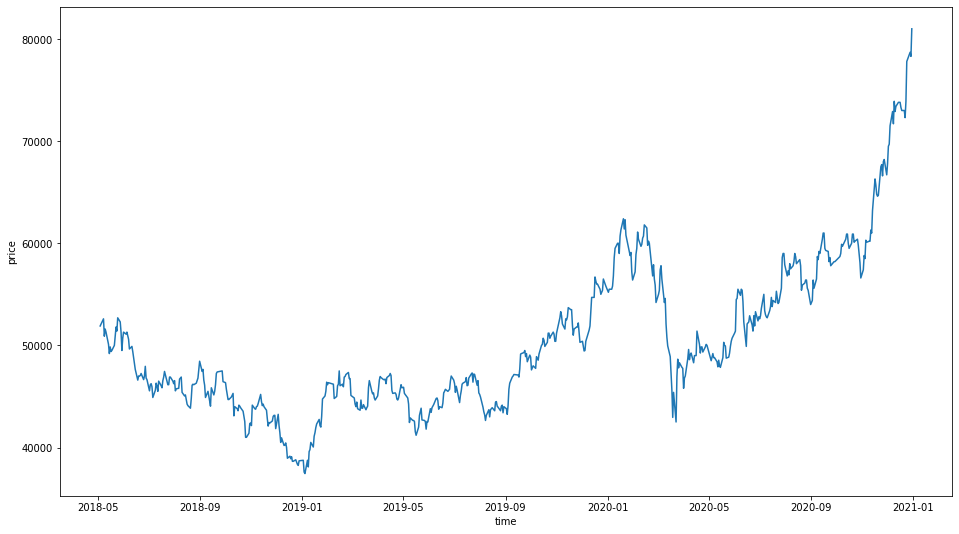

In [297]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 9))
sns.lineplot(y=samsung_new['종가'], x=samsung_new['일자'])
plt.xlabel('time')
plt.ylabel('price')

In [193]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()

scale_cols = ['시가','고가','저가','종가','거래량']
df_scaled = minmax.fit_transform(samsung_new[scale_cols])
df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = scale_cols

In [194]:
df_scaled

,시가,고가,저가,종가,거래량
0,0.019254,0.029748,0.032648,0.028703,0.092981
1,0.030084,0.027460,0.030230,0.018370,0.103311
2,0.022864,0.026316,0.035067,0.020666,0.140496
3,0.025271,0.033181,0.035067,0.030999,0.090091
4,0.018051,0.024027,0.030230,0.027555,0.178398
...,...,...,...,...,...
649,0.451264,0.453089,0.460701,0.444317,0.323175
650,0.439230,0.430206,0.453446,0.421355,0.094834
651,0.419976,0.411899,0.429262,0.414466,0.099390
652,0.446450,0.434783,0.436518,0.414466,0.186440


# train, test 분리

In [260]:
TEST_SIZE = 600
WINDOW_SIZE = 4

train = df_scaled[:-TEST_SIZE]
test = df_scaled[-TEST_SIZE:]

In [261]:
def make_dataset(data, label, window_size = 4):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

In [262]:
from sklearn.model_selection import train_test_split

feature_cols = ['시가', '고가', '저가', '거래량']
label_cols = ['종가']

train_feature = train[feature_cols]
train_label = train[label_cols]

train_feature, train_label = make_dataset(train_feature, train_label, 20)

x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size=0.2)
x_train.shape, x_valid.shape

((27, 20, 4), (7, 20, 4))

In [263]:
test_feature = test[feature_cols]
test_label = test[label_cols]

test_feature.shape, test_label.shape

((600, 4), (600, 1))

In [264]:
test_feature, test_label = make_dataset(test_feature, test_label, 20)
test_feature.shape, test_label.shape

((580, 20, 4), (580, 1))

In [265]:
train_feature.shape

(34, 20, 4)

In [266]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM

model = Sequential()
model.add(LSTM(16, 
               input_shape=(train_feature.shape[1], train_feature.shape[2]), 
               activation='relu', 
               return_sequences=False)
          )

model.add(Dense(1))

In [267]:
import os

model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='val_loss', patience=5)

model_path = 'model'
filename = os.path.join(model_path, 'tmp_checkpoint.h5')
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

history = model.fit(x_train, y_train, 
                                    epochs=200, 
                                    batch_size=16,
                                    validation_data=(x_valid, y_valid), 
                                    callbacks=[early_stop, checkpoint])

Epoch 1/200
1/2 [==============>...............] - ETA: 2s - loss: 0.0065
Epoch 00001: val_loss improved from inf to 0.00586, saving model to model/tmp_checkpoint.h5
2/2 [==============================] - 2s 292ms/step - loss: 0.0066 - val_loss: 0.0059
Epoch 2/200
1/2 [==============>...............] - ETA: 0s - loss: 0.0056
Epoch 00002: val_loss improved from 0.00586 to 0.00477, saving model to model/tmp_checkpoint.h5
2/2 [==============================] - 0s 51ms/step - loss: 0.0053 - val_loss: 0.0048
Epoch 3/200
1/2 [==============>...............] - ETA: 0s - loss: 0.0047
Epoch 00003: val_loss improved from 0.00477 to 0.00386, saving model to model/tmp_checkpoint.h5
2/2 [==============================] - 0s 54ms/step - loss: 0.0043 - val_loss: 0.0039
Epoch 4/200
1/2 [==============>...............] - ETA: 0s - loss: 0.0046
Epoch 00004: val_loss improved from 0.00386 to 0.00308, saving model to model/tmp_checkpoint.h5
2/2 [==============================] - 0s 53ms/step - loss: 0.003

In [268]:
model.load_weights(filename)
pred = model.predict(test_feature)

pred.shape

(580, 1)

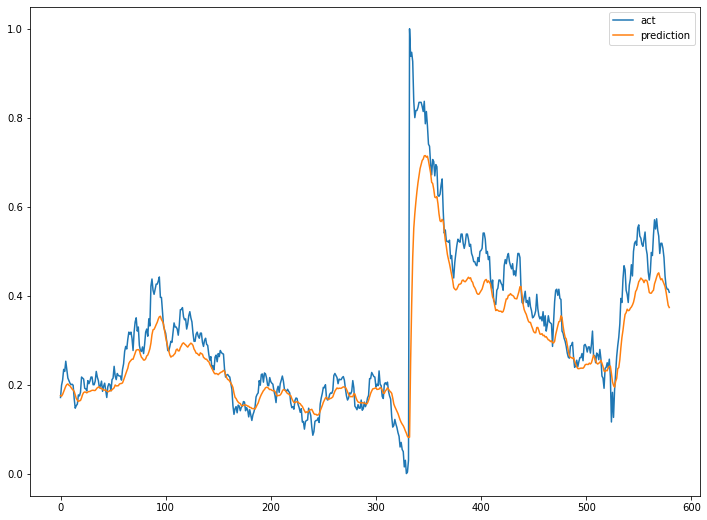

In [269]:
plt.figure(figsize=(12, 9))
plt.plot(test_label, label = 'act')
plt.plot(pred, label = 'prediction')
plt.legend()
plt.show()